In [2]:
import numpy as np
import matplotlib.pyplot as plt

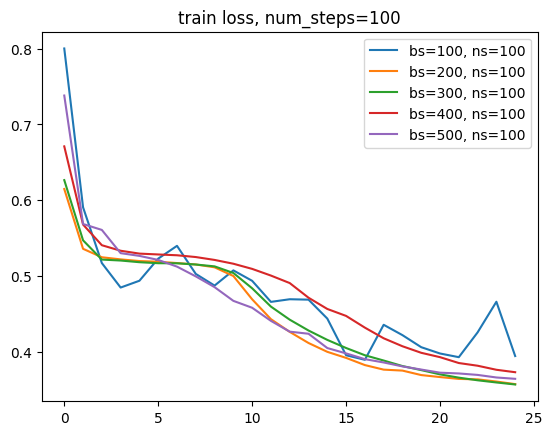

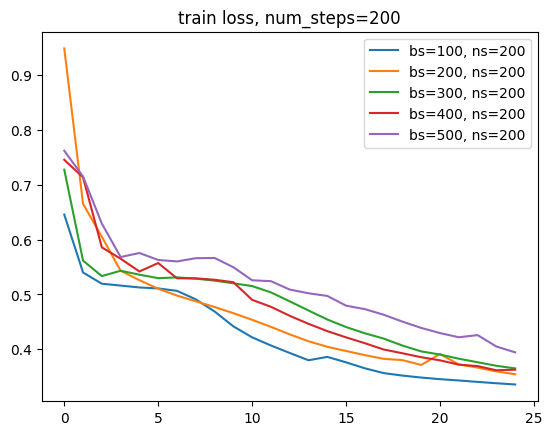

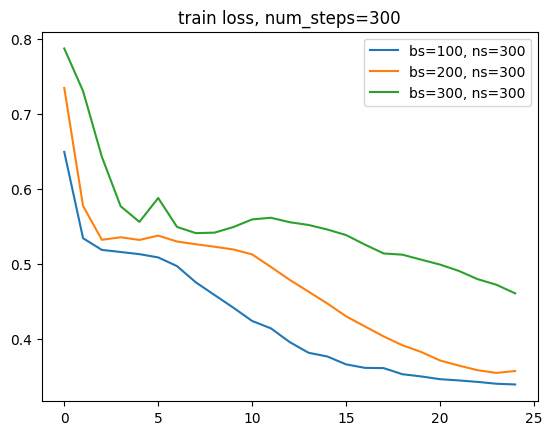

In [2]:
batch_sizes = [100,200,300,400,500]
steps_nums = [100,200,300]
epochs = 25

for sn in steps_nums:
    for bs in batch_sizes:
        if (bs == 400 or bs == 500) and sn > 200:
            continue

        path = 'scores/batch_sizes/bs_' + str(bs) + '_ns_' + str(sn) + '.npy'
        scores = np.load(path)
        tl = scores[:,0]
        plt.plot(range(epochs), tl,label=f'bs={bs}, ns={sn}')
    plt.title(f'train loss, num_steps={sn}')
    plt.legend()
    # plt.savefig(f'plots/train_loss_num_steps_{sn}.png')
    plt.draw()
    plt.pause(0.05)

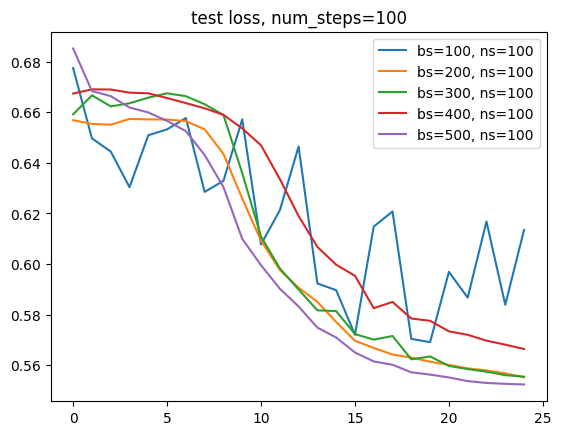

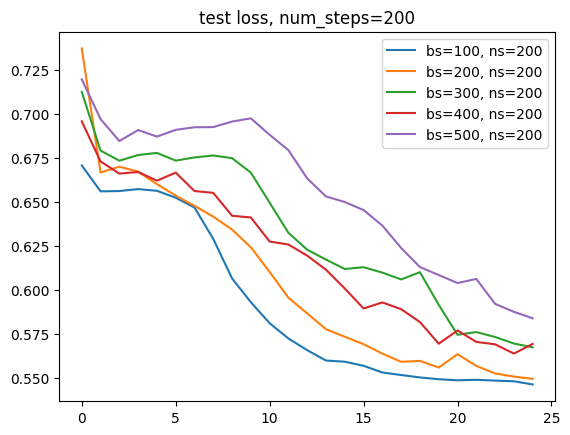

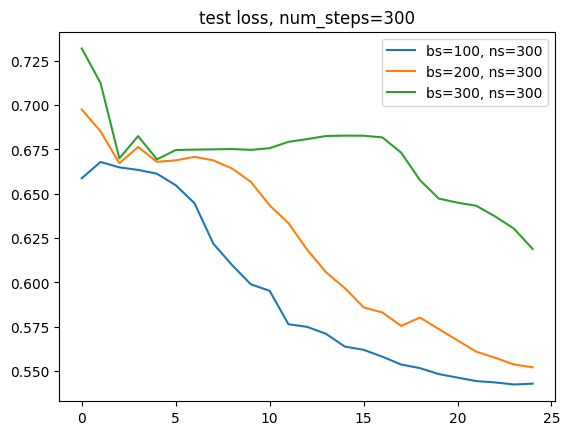

In [3]:
batch_sizes = [100,200,300,400,500]
steps_nums = [100,200,300]
epochs = 25

for sn in steps_nums:
    for bs in batch_sizes:
        if (bs == 400 or bs == 500) and sn > 200:
            continue

        path = 'scores/batch_sizes/bs_' + str(bs) + '_ns_' + str(sn) + '.npy'
        scores = np.load(path)
        vl = scores[:,1]
        plt.plot(range(epochs), vl,label=f'bs={bs}, ns={sn}')
    plt.title(f'test loss, num_steps={sn}')
    plt.legend()
    # plt.savefig(f'plots/test_loss_num_steps_{sn}.png')
    plt.draw()
    plt.pause(0.05)

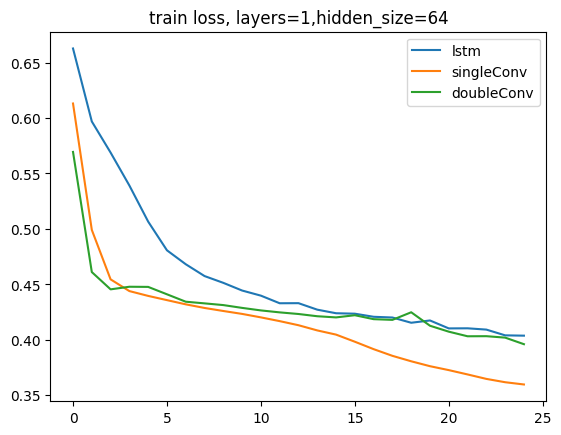

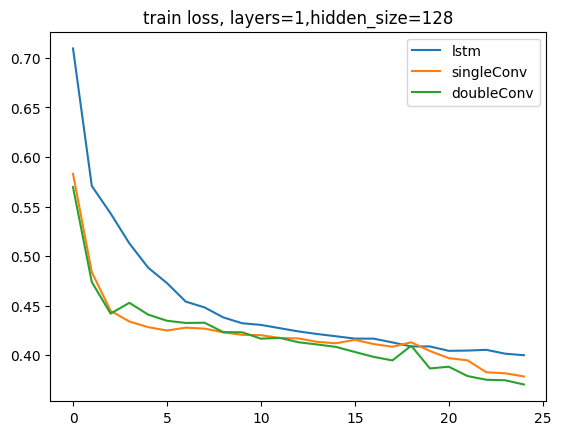

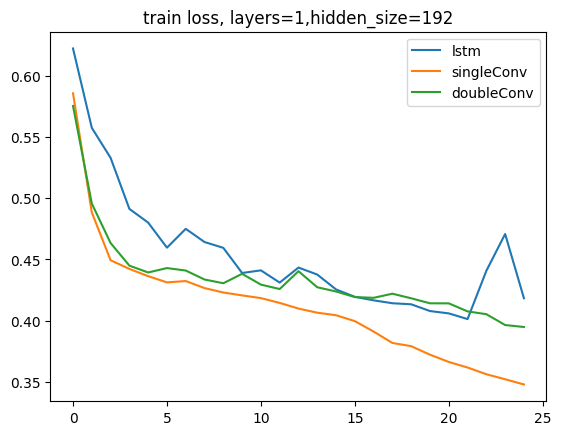

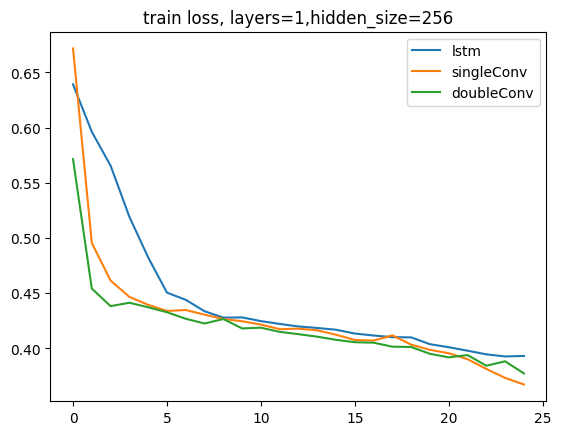

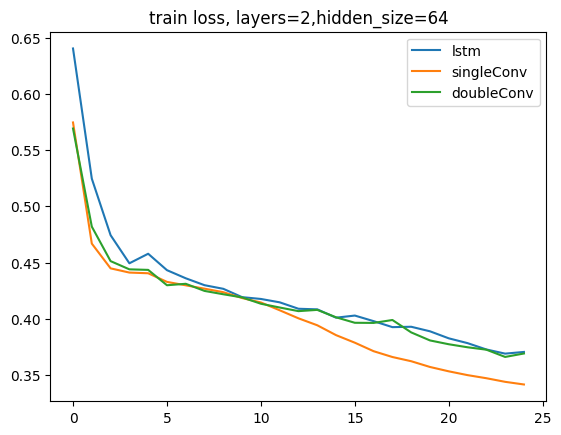

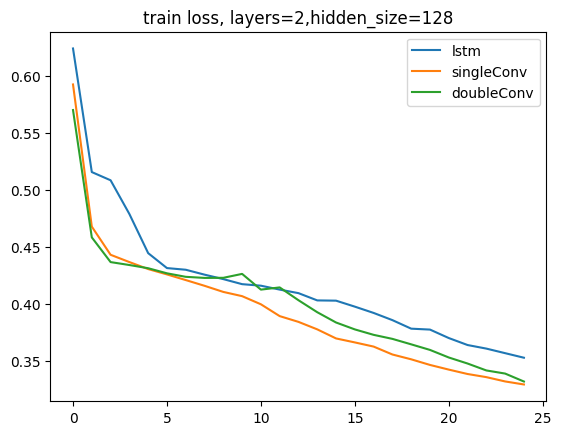

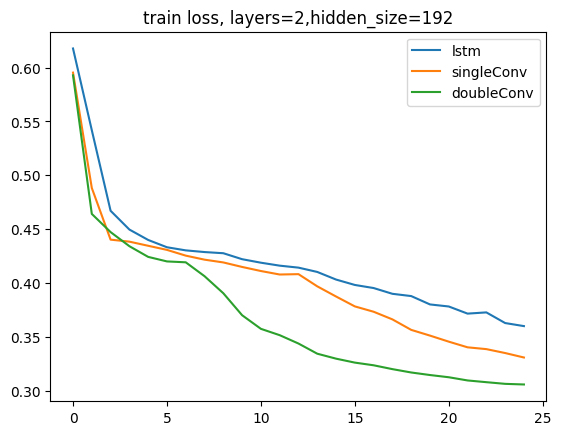

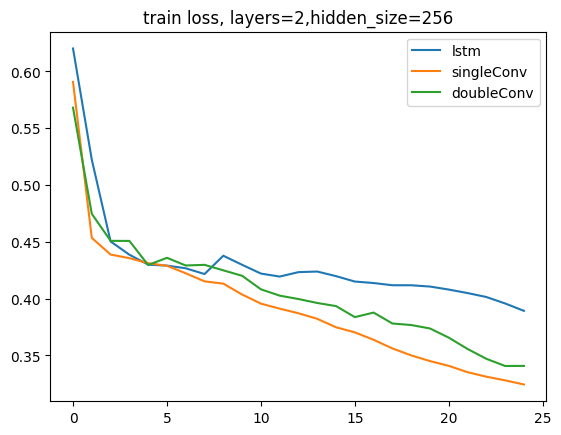

In [4]:
layers = [1,2]
hidden_sizes = [64,128,192,256]
epochs = 25

for layer in layers:
    for hidden_size in hidden_sizes:
        path = 'scores/grid_search/gs_lstm_' + str(layer) + '_' + str(hidden_size) + '.npy'
        sc_path = 'scores/grid_search/gs_sc_' + str(layer) + '_' + str(hidden_size) + '.npy'
        dc_path = 'scores/grid_search/gs_dc_' + str(layer) + '_' + str(hidden_size) + '.npy'
        scores = np.load(path)
        sc_scores = np.load(sc_path)
        dc_scores = np.load(dc_path)
        lstm_tl = scores[:,0]
        sc_tl = sc_scores[:,0]
        dc_tl = dc_scores[:,0]
        plt.plot(range(epochs), lstm_tl,label='lstm')
        plt.plot(range(epochs), sc_tl,label='singleConv')
        plt.plot(range(epochs), dc_tl,label='doubleConv')
        plt.title(f'train loss, layers={layer},hidden_size={hidden_size}')
        plt.legend()
        # plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
        plt.draw()
        plt.pause(0.05)

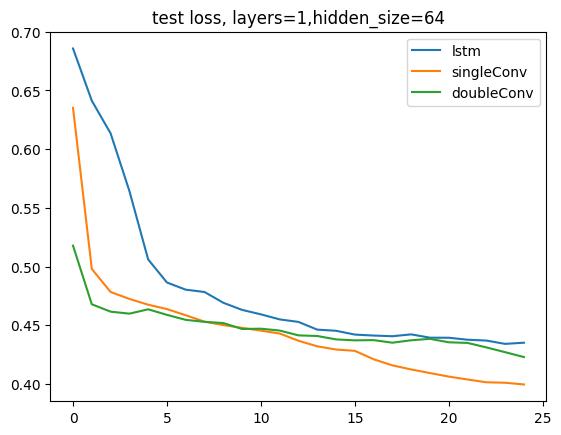

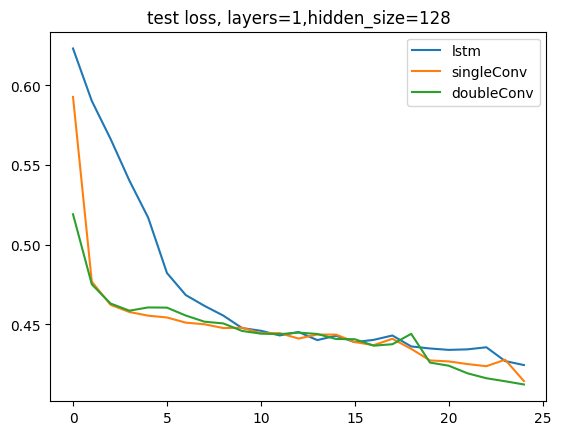

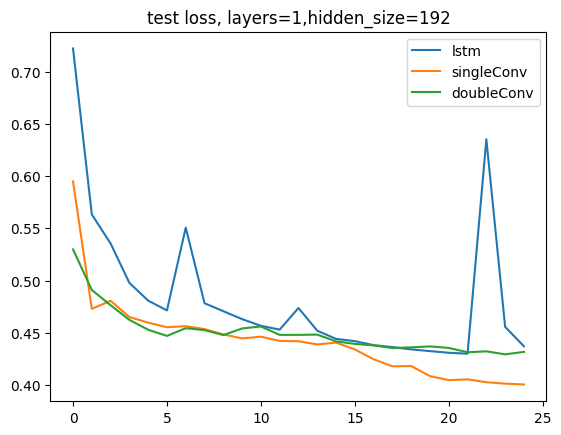

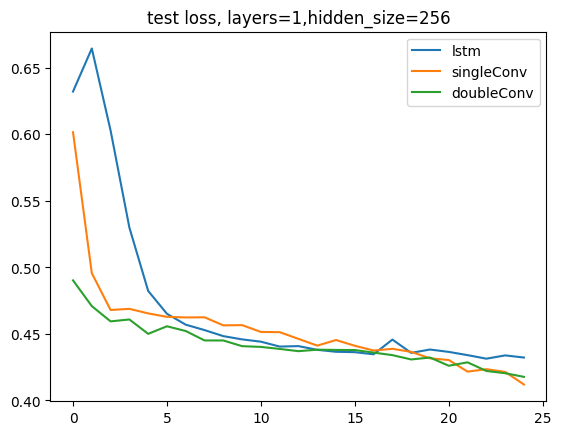

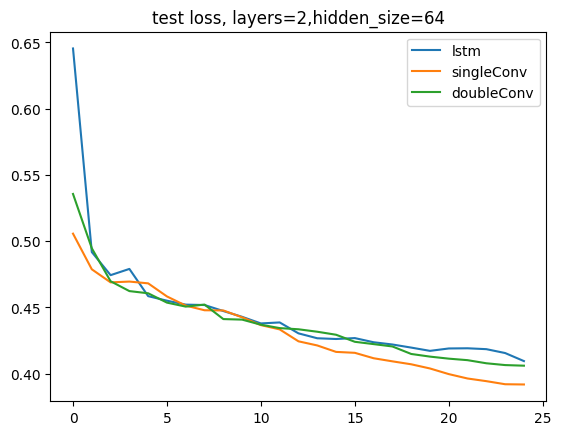

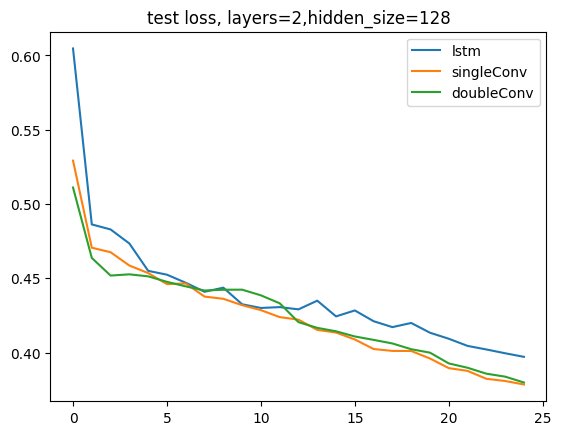

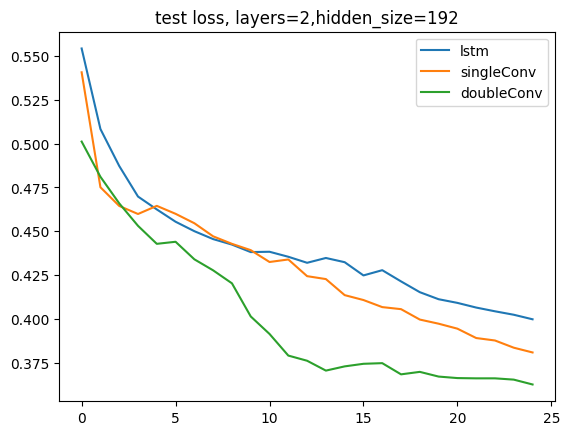

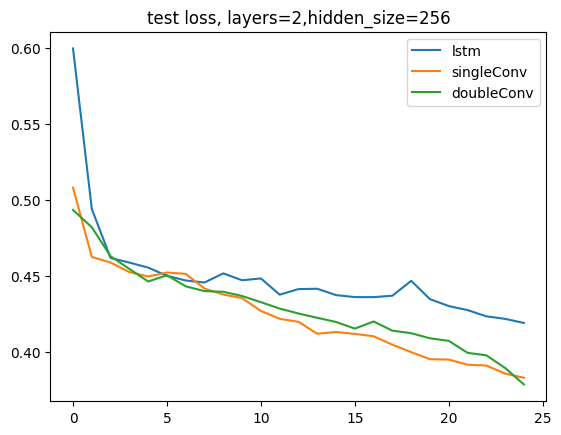

In [5]:
layers = [1,2]
hidden_sizes = [64,128,192,256]
epochs = 25

for layer in layers:
    for hidden_size in hidden_sizes:
        path = 'scores/grid_search/gs_lstm_' + str(layer) + '_' + str(hidden_size) + '.npy'
        sc_path = 'scores/grid_search/gs_sc_' + str(layer) + '_' + str(hidden_size) + '.npy'
        dc_path = 'scores/grid_search/gs_dc_' + str(layer) + '_' + str(hidden_size) + '.npy'
        scores = np.load(path)
        sc_scores = np.load(sc_path)
        dc_scores = np.load(dc_path)
        lstm_tl = scores[:,1]
        sc_tl = sc_scores[:,1]
        dc_tl = dc_scores[:,1]
        plt.plot(range(epochs), lstm_tl,label='lstm')
        plt.plot(range(epochs), sc_tl,label='singleConv')
        plt.plot(range(epochs), dc_tl,label='doubleConv')
        plt.title(f'test loss, layers={layer},hidden_size={hidden_size}')
        plt.legend()
        # plt.savefig(f'plots/test_loss_gs_{layer}_{hidden_size}.png')
        plt.draw()
        plt.pause(0.05)

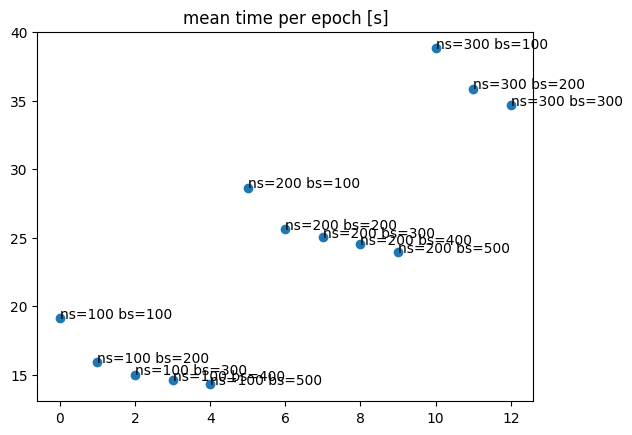

In [8]:
batch_sizes = [100,200,300,400,500]
steps_nums = [100,200,300]
epochs = 25
mean_times = {}
for sn in steps_nums:
    for bs in batch_sizes:
        if (bs == 400 or bs == 500) and sn > 200:
            continue

        path = 'scores/batch_sizes/bs_' + str(bs) + '_ns_' + str(sn) + '.npy'
        scores = np.load(path)
        et = scores[:,2]
        mean_times.update({f'ns={sn} bs={bs}':np.mean(et)})

# print(mean_times)
x = range(13)
y = list(mean_times.values())
# plt.bar(x,y)
plt.scatter(x,y)

for i,v in enumerate(list(mean_times.keys())):
        plt.annotate(v,(x[i],y[i]))
plt.title('mean time per epoch [s]')
# plt.savefig('plots/bs_tpe.png')
plt.draw()
plt.pause(0.05)

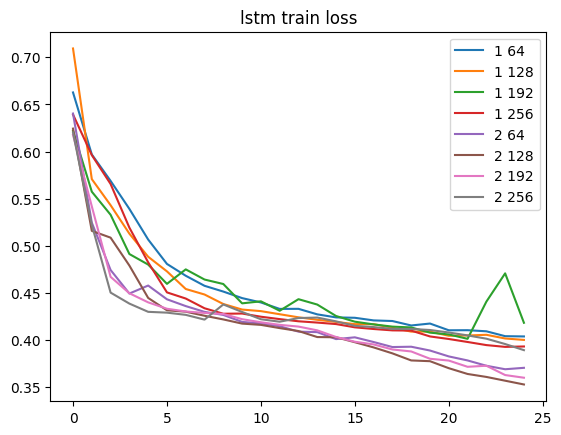

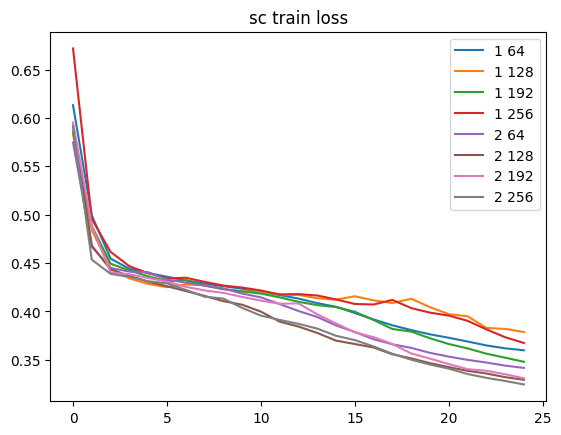

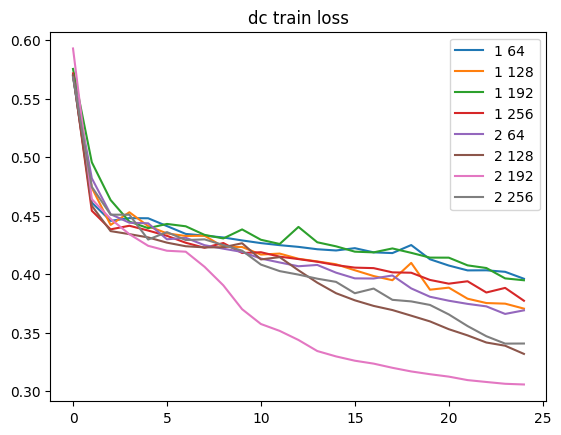

In [9]:
layers = [1,2]
hidden_sizes = [64,128,192,256]
epochs = 25
models = ['lstm','sc','dc']

scores
for m in models:
    for layer in layers:
        for hidden_size in hidden_sizes:
            path = 'scores/grid_search/gs_' + m + '_' + str(layer) + '_' + str(hidden_size) + '.npy'
            scores = np.load(path)
            tl = scores[:,0]
            plt.plot(range(epochs), tl,label=f'{layer} {hidden_size}')
    plt.title(f'{m} train loss')
    plt.legend()
    # plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
    plt.draw()
    plt.pause(0.05)

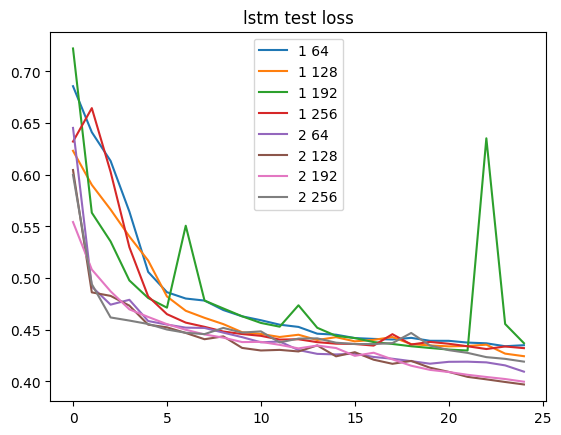

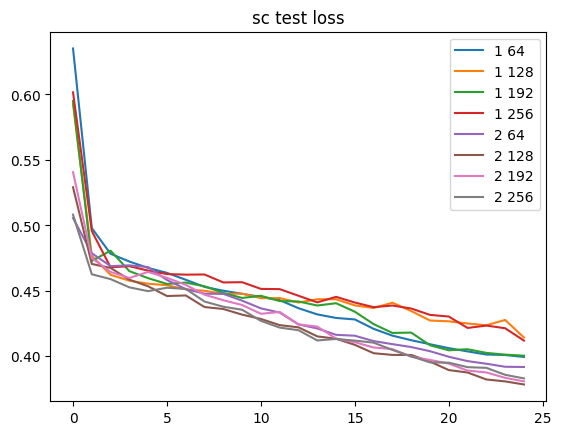

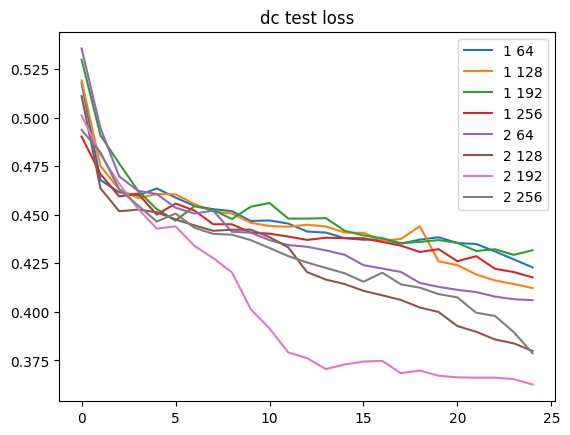

In [10]:
layers = [1,2]
hidden_sizes = [64,128,192,256]
epochs = 25
models = ['lstm','sc','dc']

scores
for m in models:
    for layer in layers:
        for hidden_size in hidden_sizes:
            path = 'scores/grid_search/gs_' + m + '_' + str(layer) + '_' + str(hidden_size) + '.npy'
            scores = np.load(path)
            tl = scores[:,1]
            plt.plot(range(epochs), tl,label=f'{layer} {hidden_size}')
    plt.title(f'{m} test loss')
    plt.legend()
    # plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
    plt.draw()
    plt.pause(0.05)

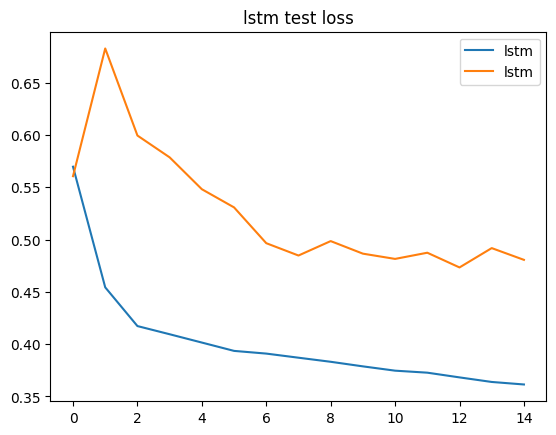

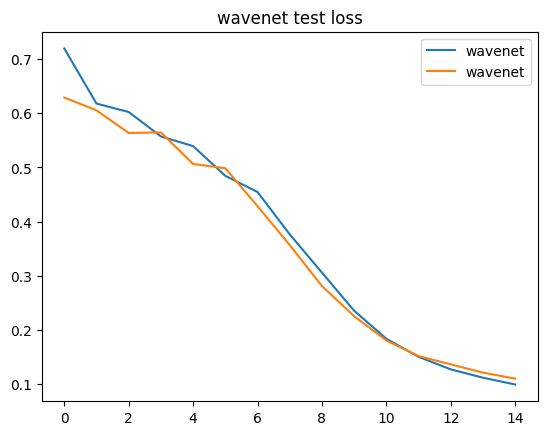

In [17]:
repeats = range(5)
folds = range(10)
epochs = range(15)
models = ['lstm','wavenet']

for m in models:
    path = 'scores/wavenet_vs_lstm/' + m + '.npy'
    scores = np.load(path)
    tls = []
    vls = []
    for e in epochs:
        tl = scores[:,e, 0]
        vl = scores[:,e, 5]
        tls.append(np.mean(tl))
        vls.append(np.mean(vl))
    plt.plot(epochs, tls,label=f'{m}')
    plt.plot(epochs, vls,label=f'{m}')
    plt.title(f'{m} test loss')
    plt.legend()
    # plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
    plt.draw()
    plt.pause(0.05)

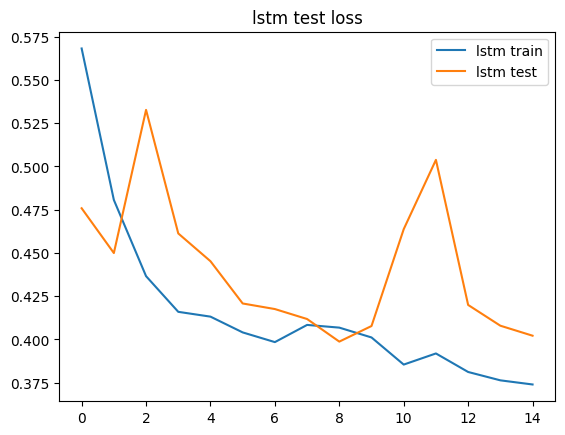

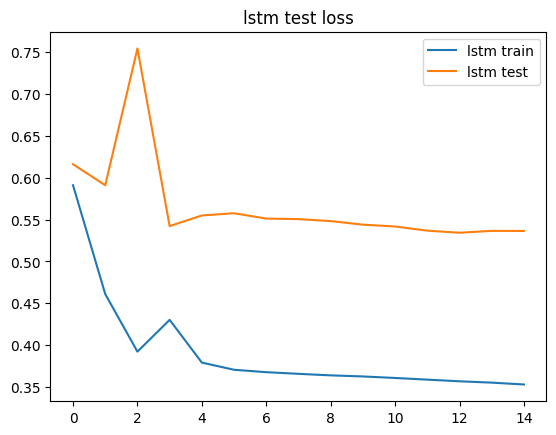

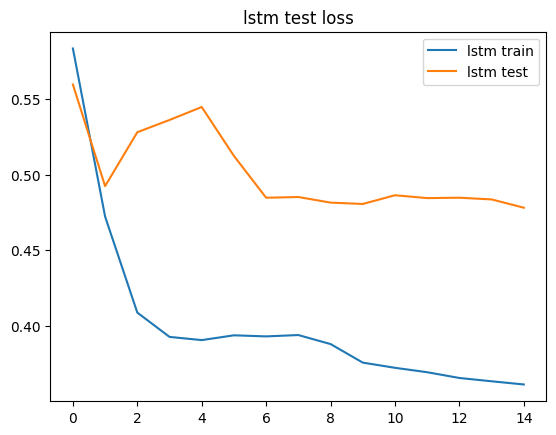

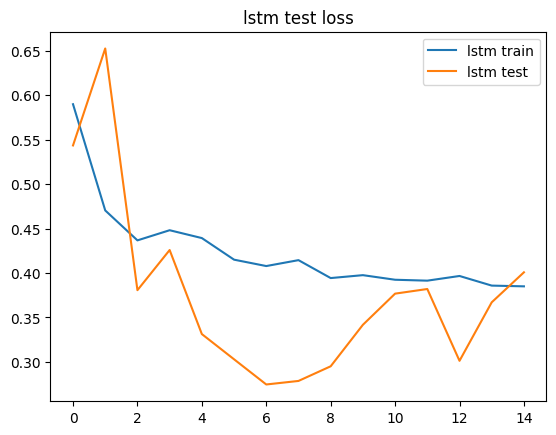

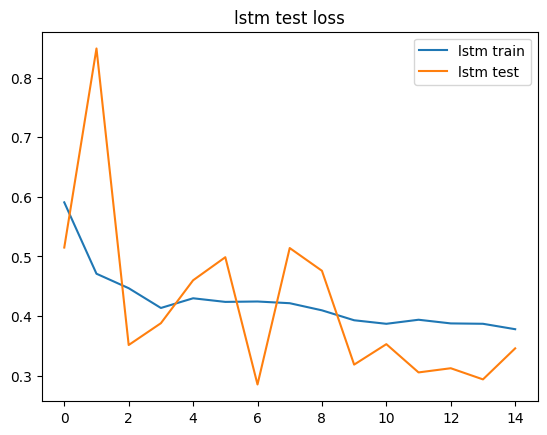

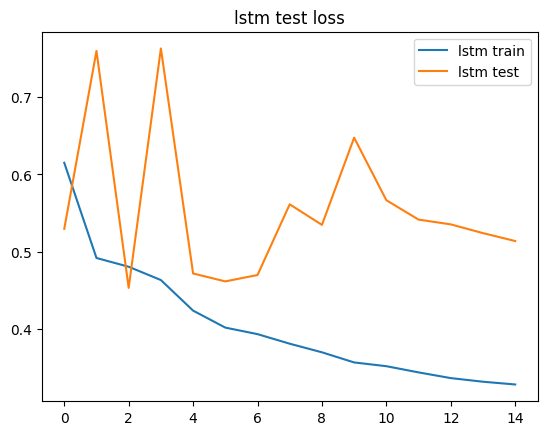

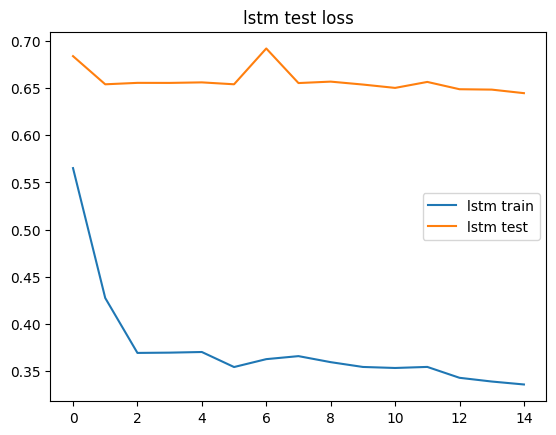

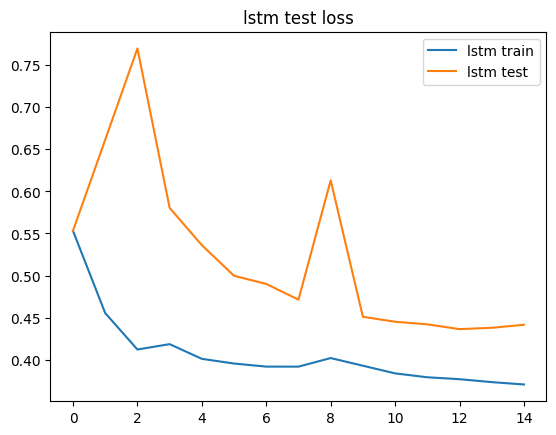

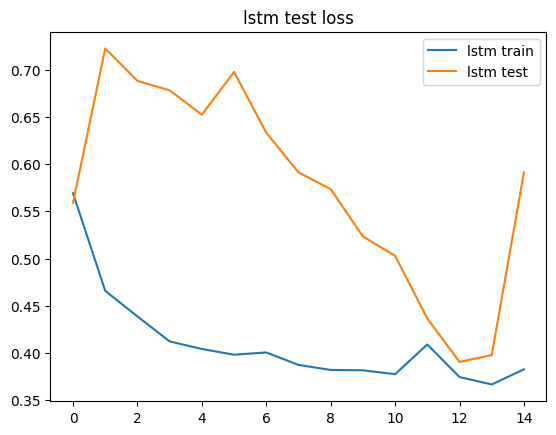

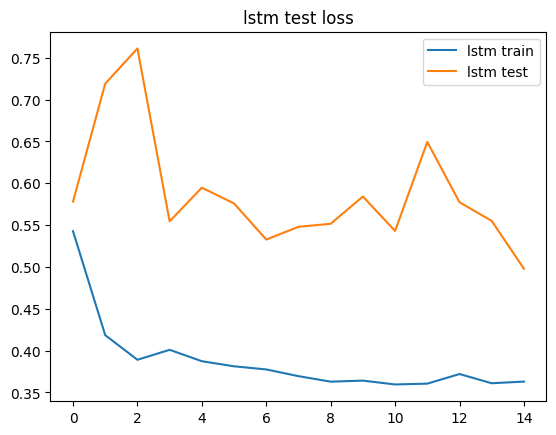

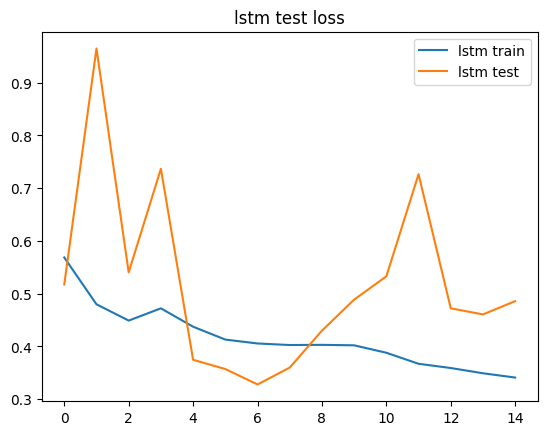

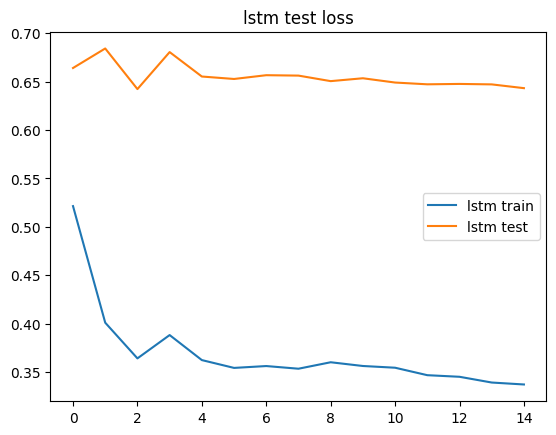

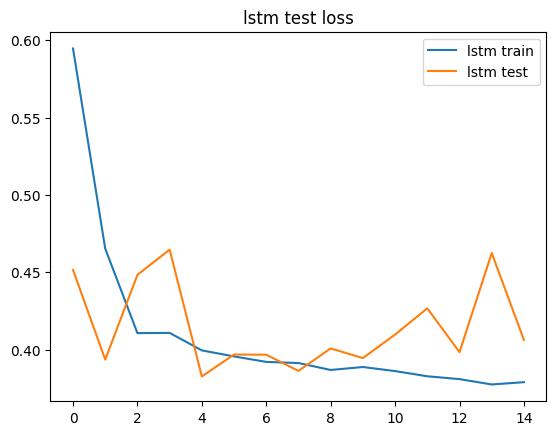

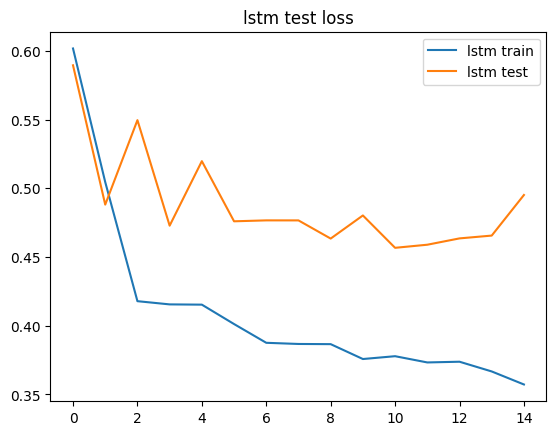

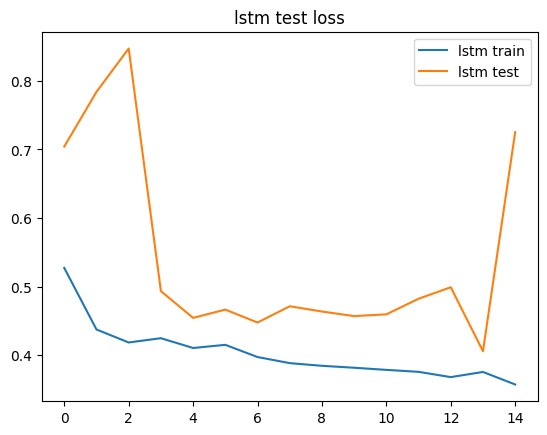

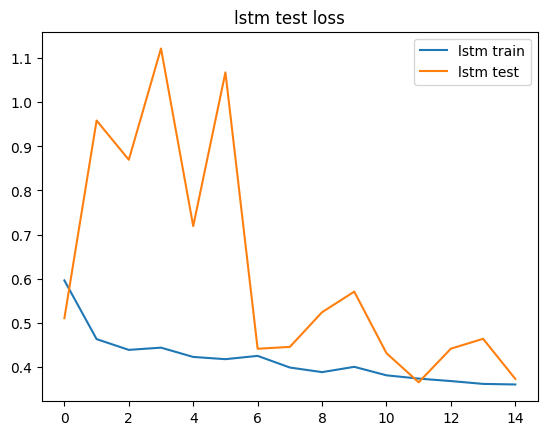

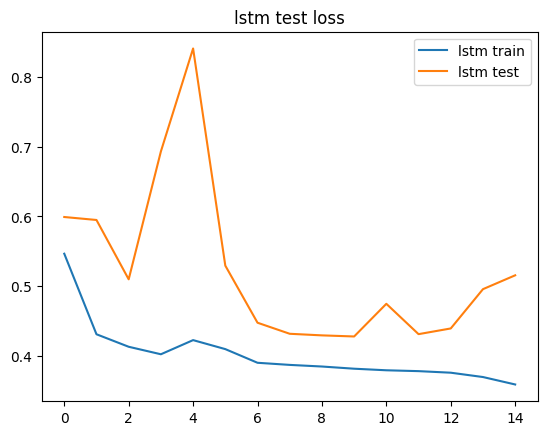

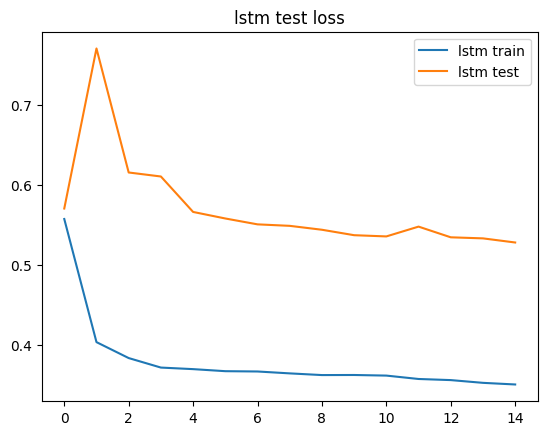

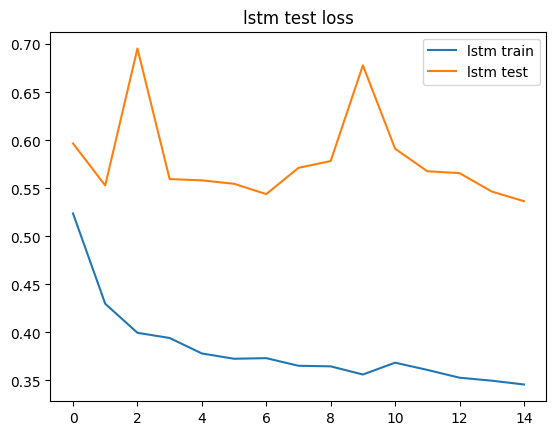

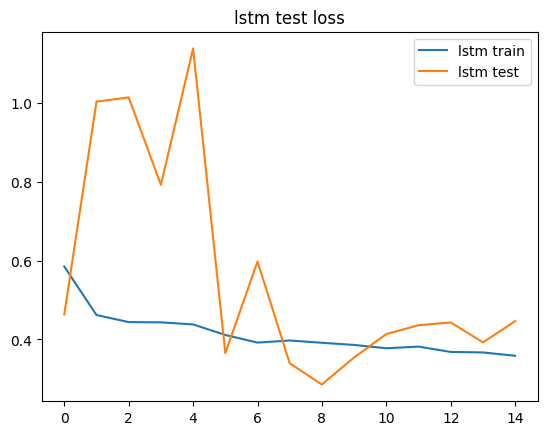

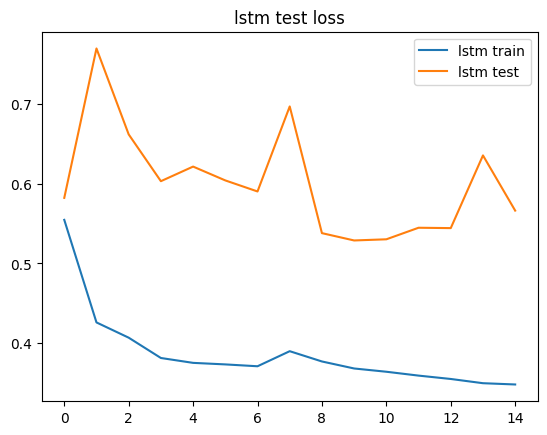

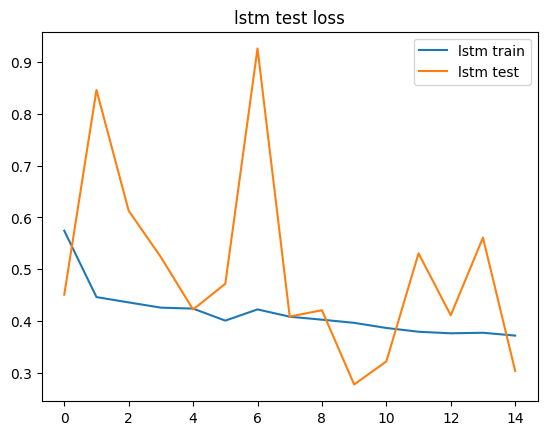

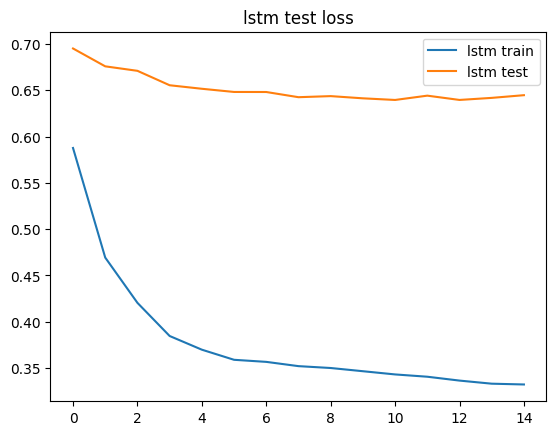

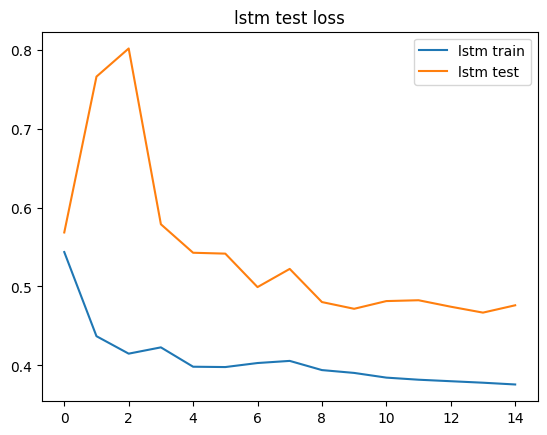

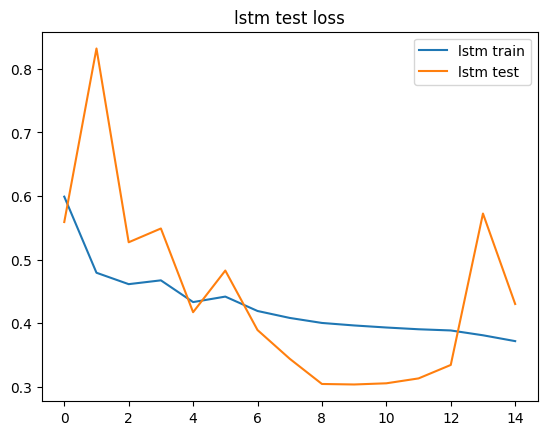

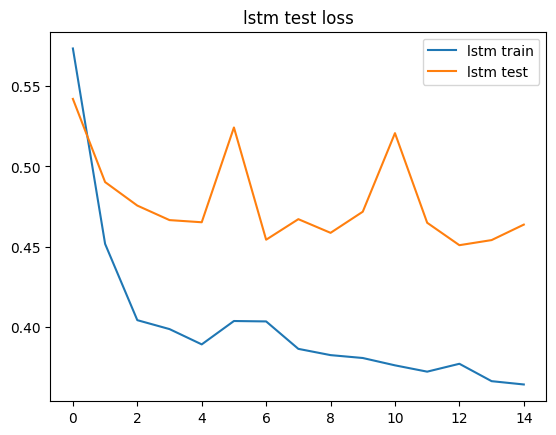

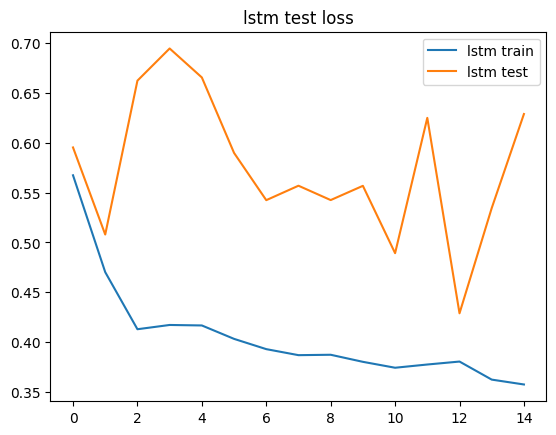

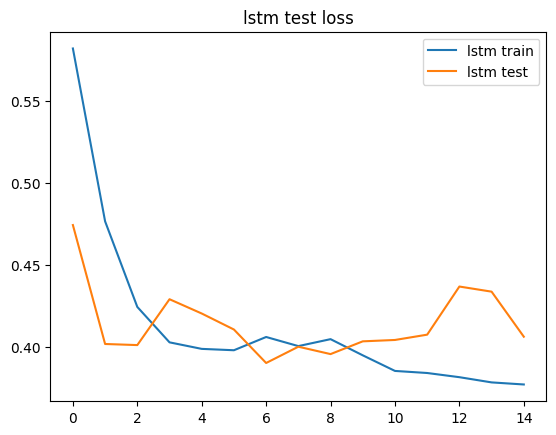

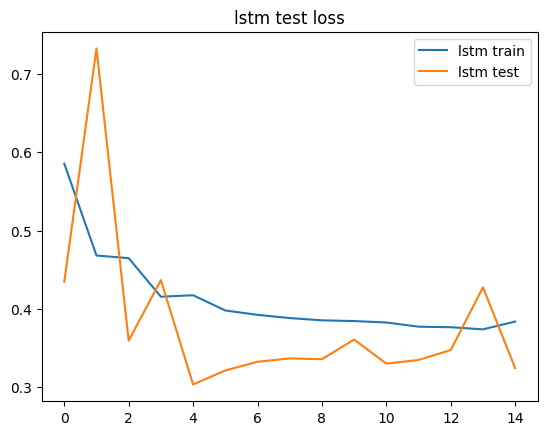

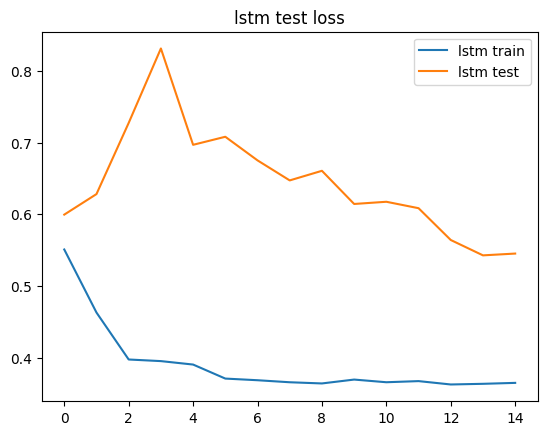

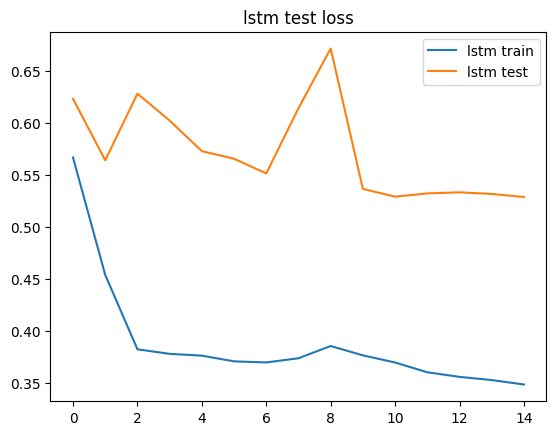

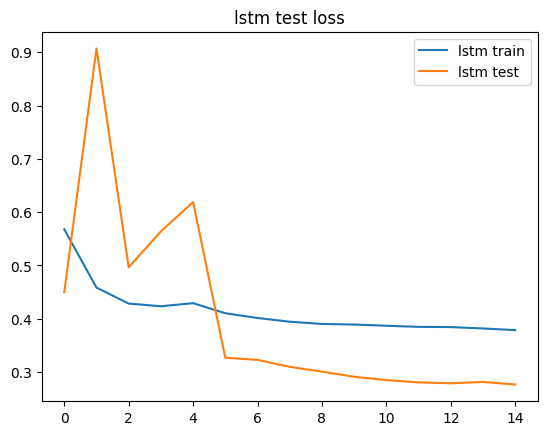

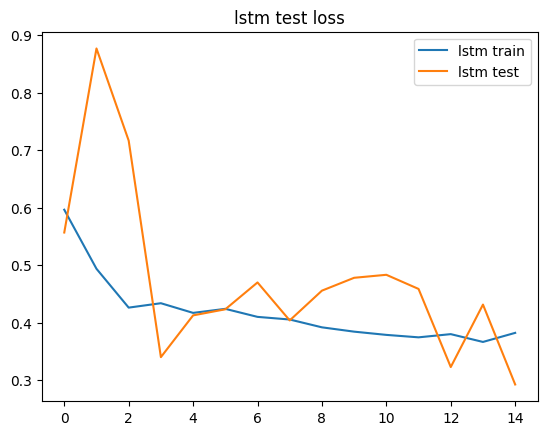

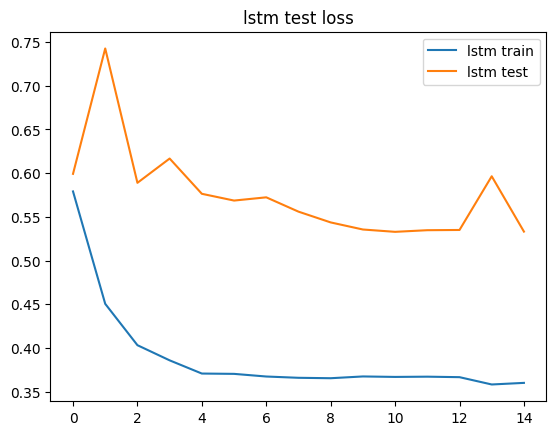

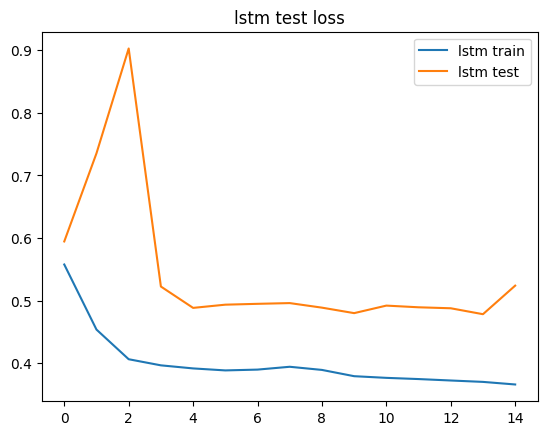

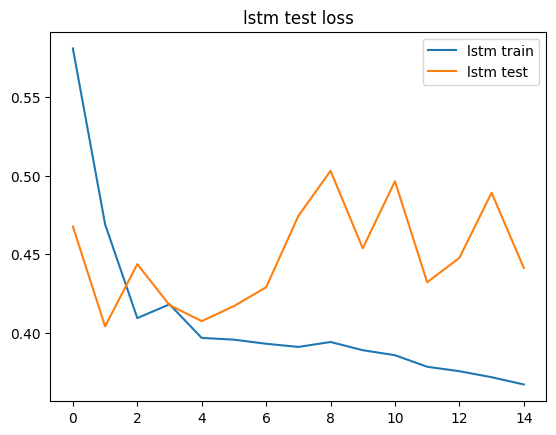

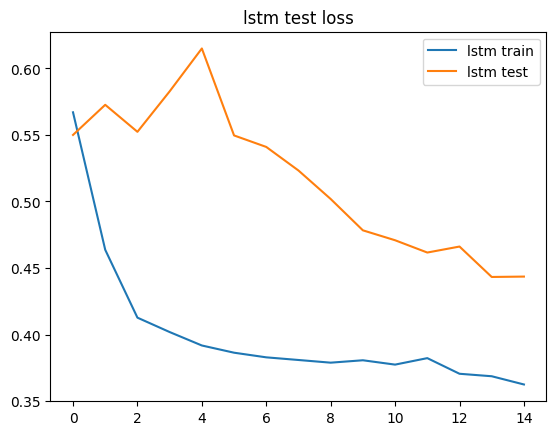

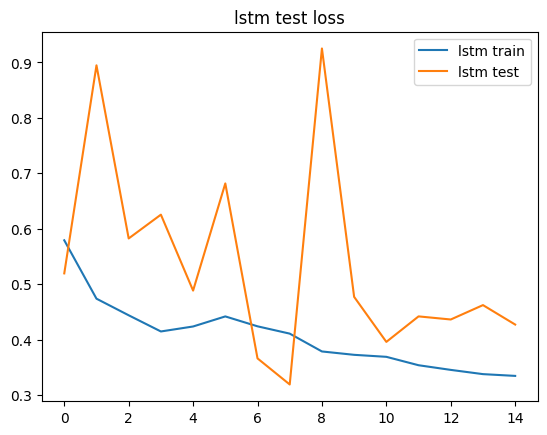

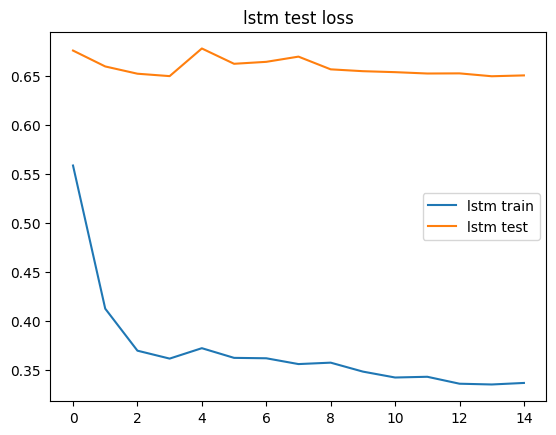

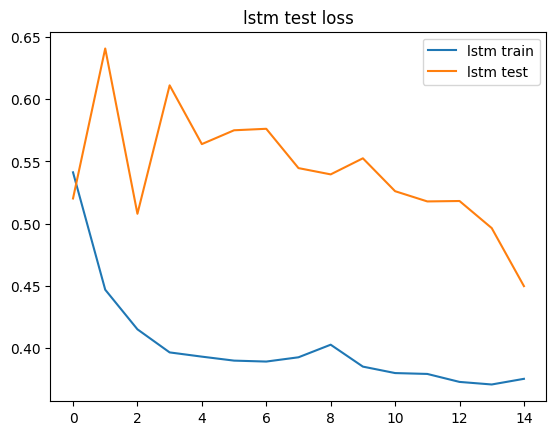

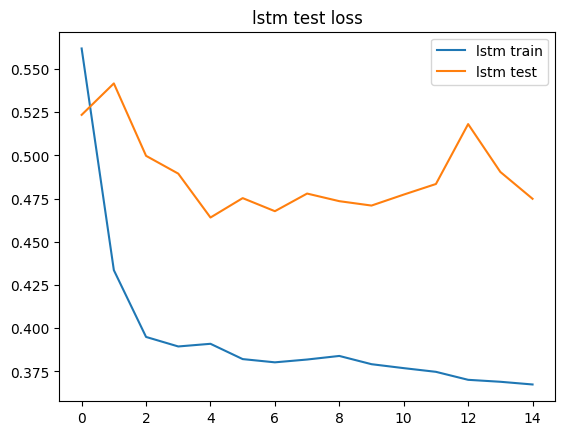

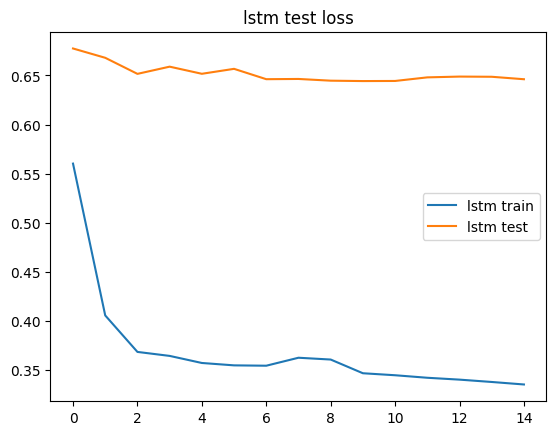

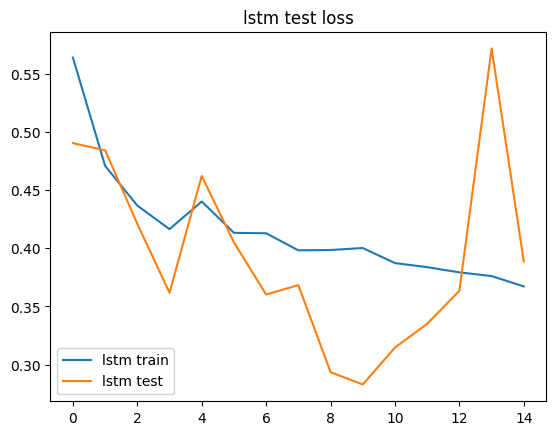

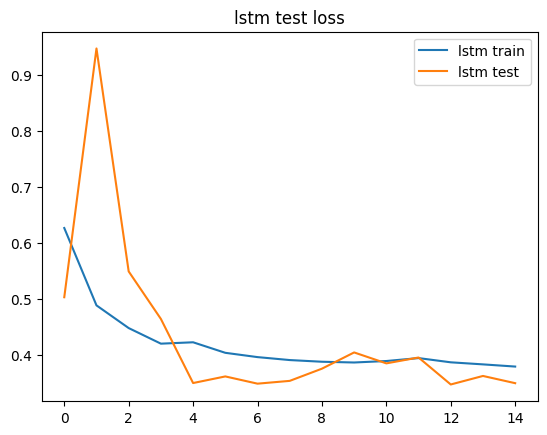

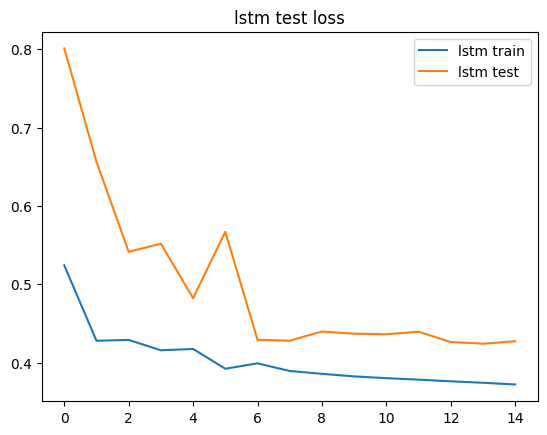

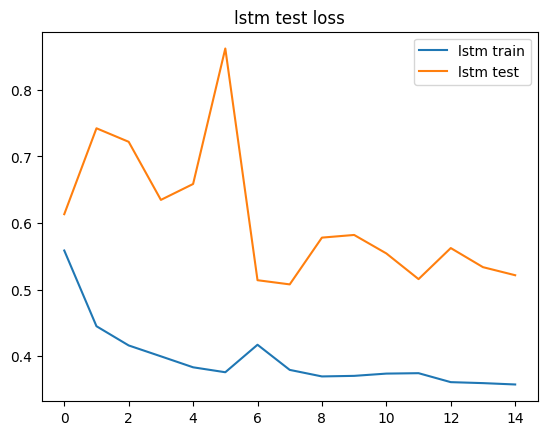

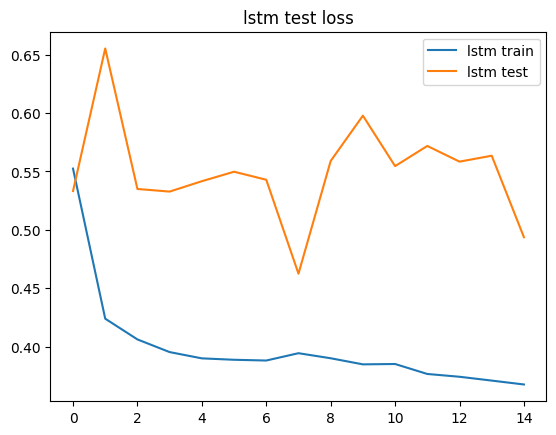

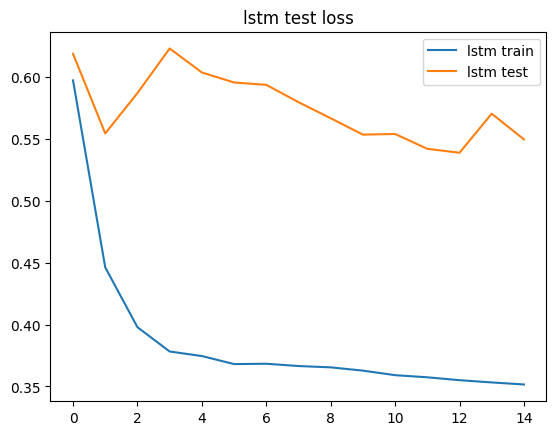

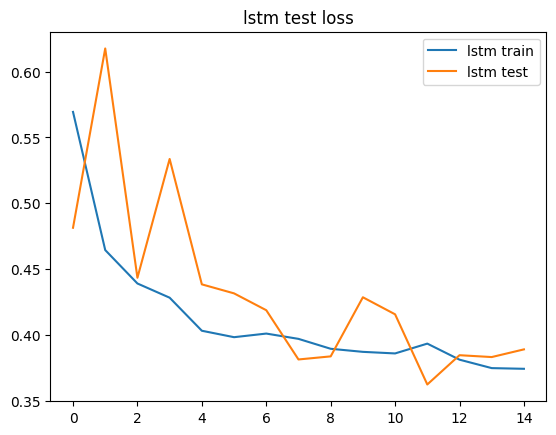

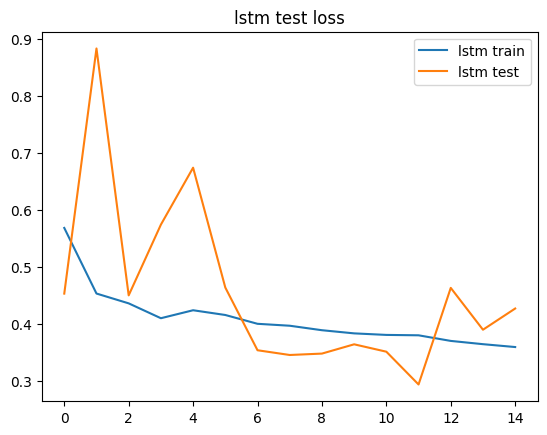

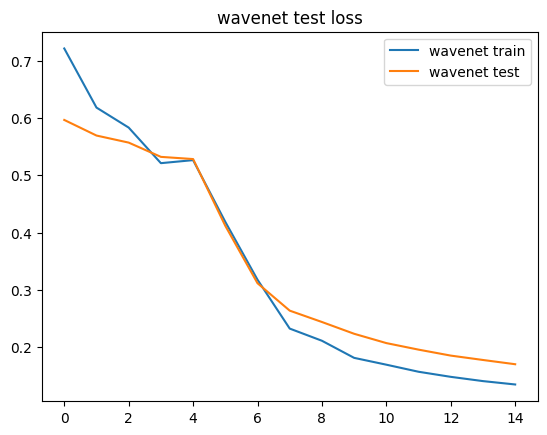

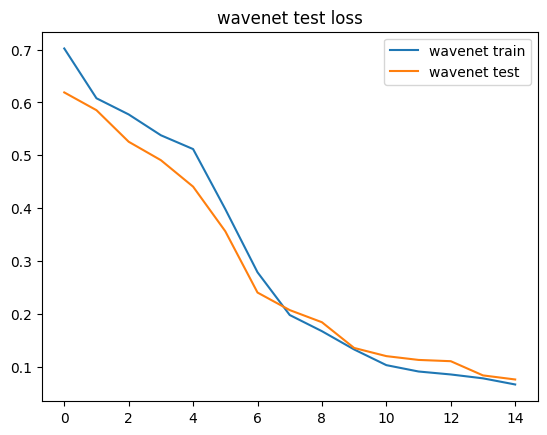

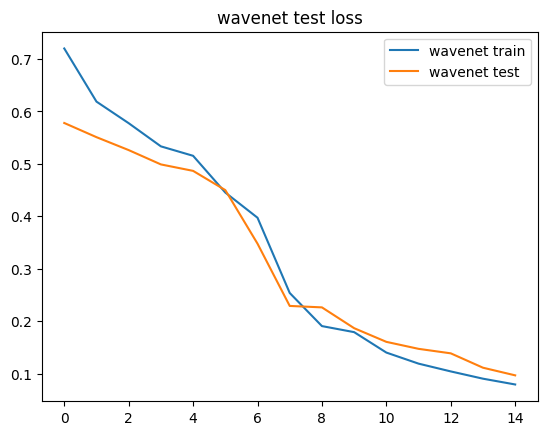

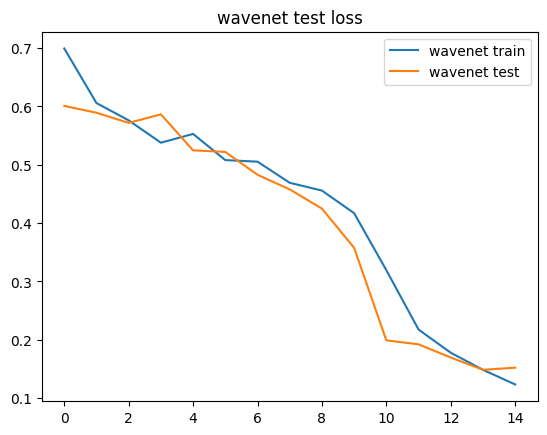

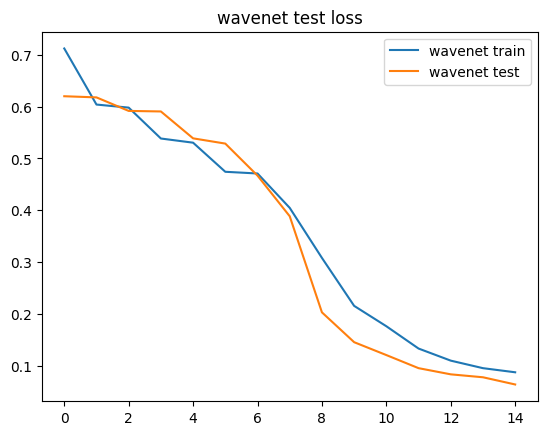

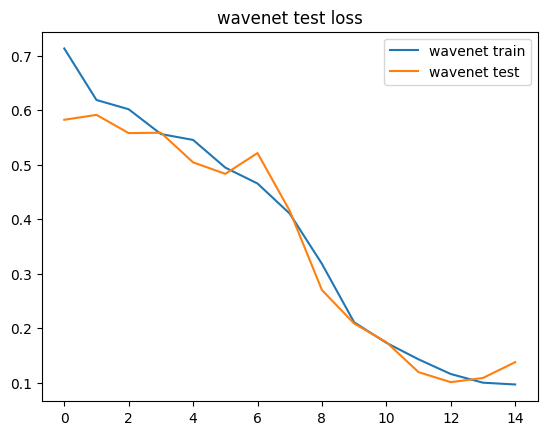

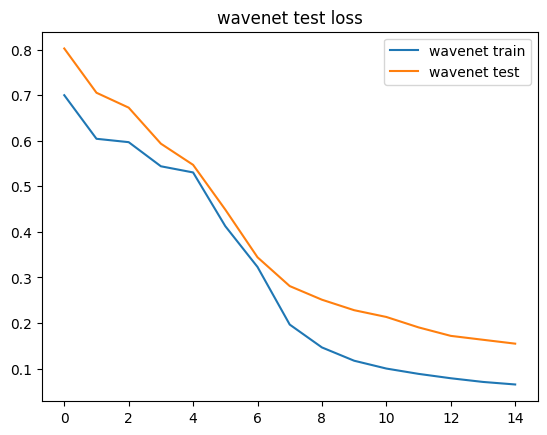

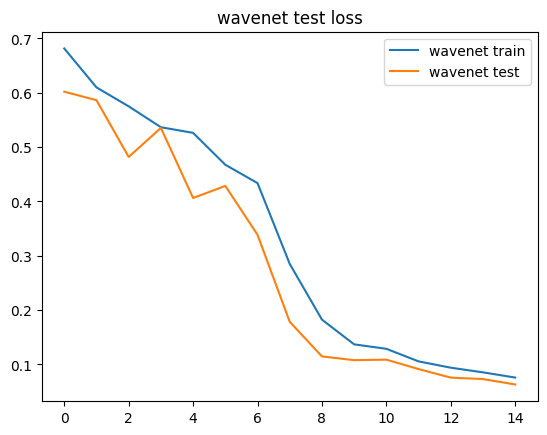

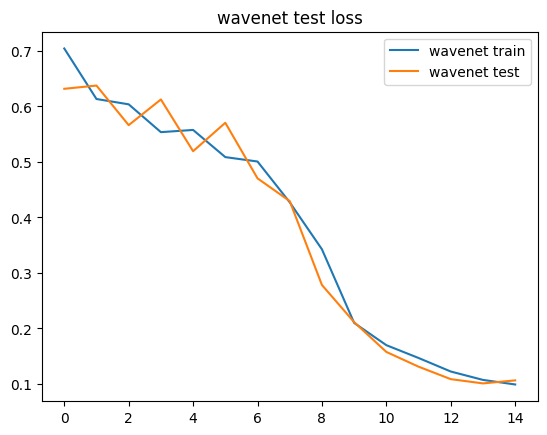

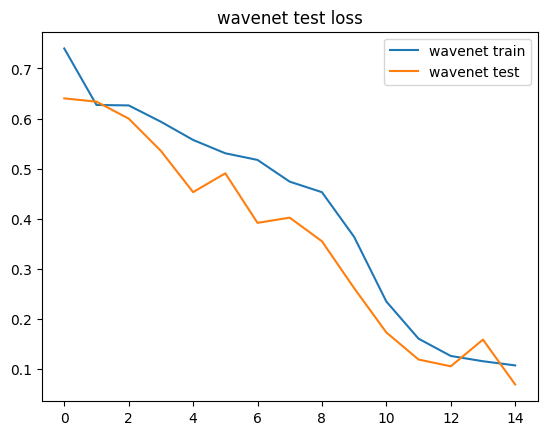

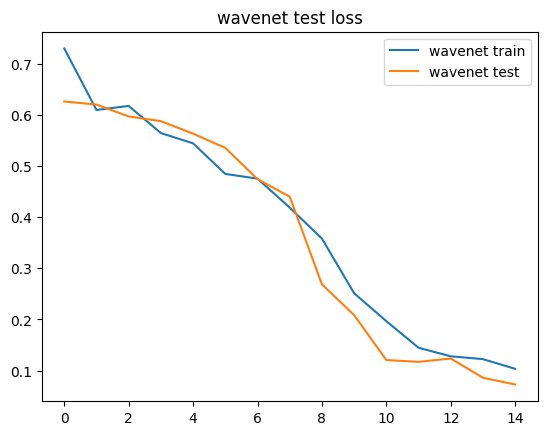

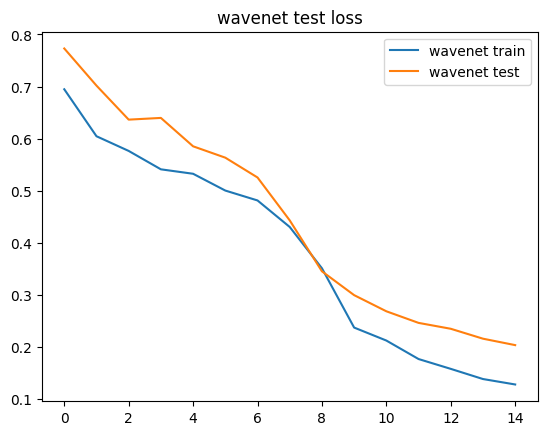

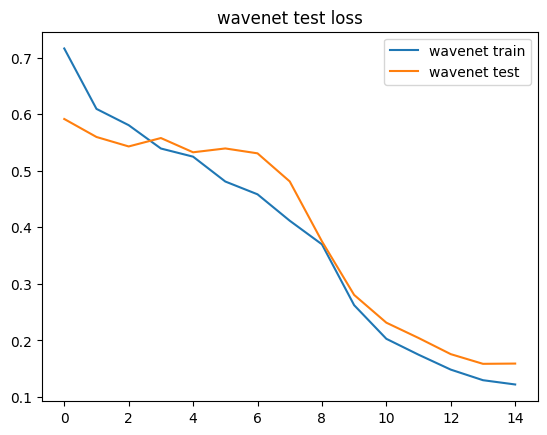

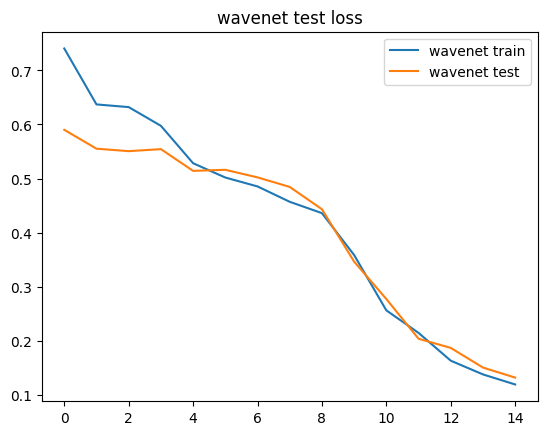

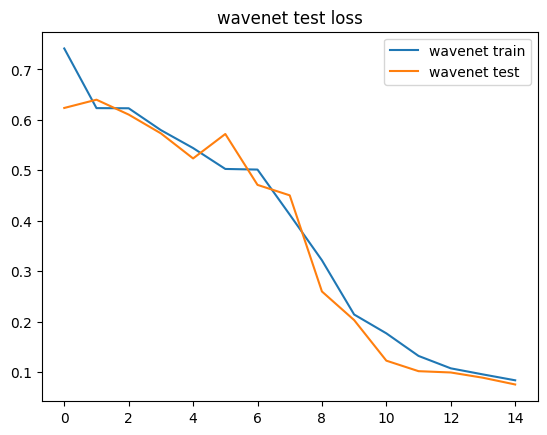

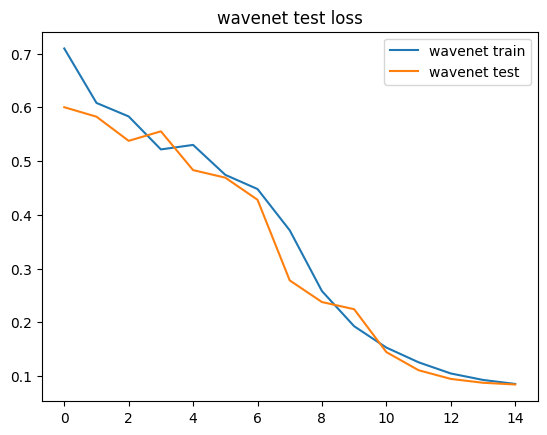

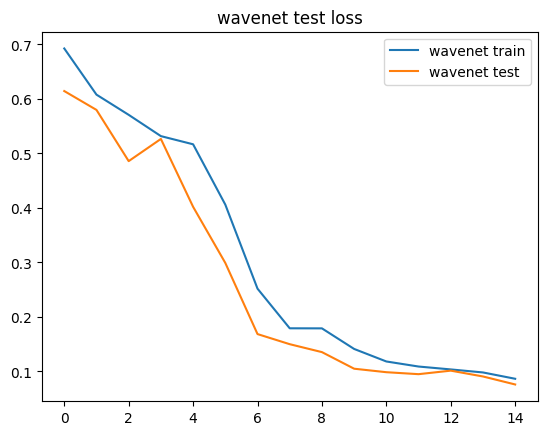

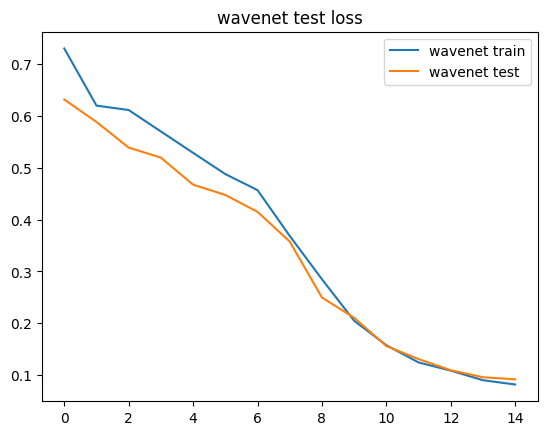

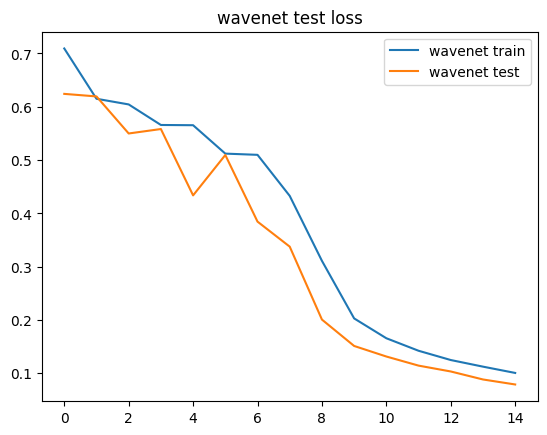

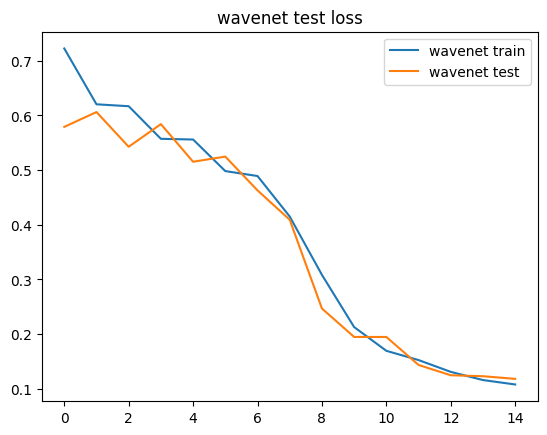

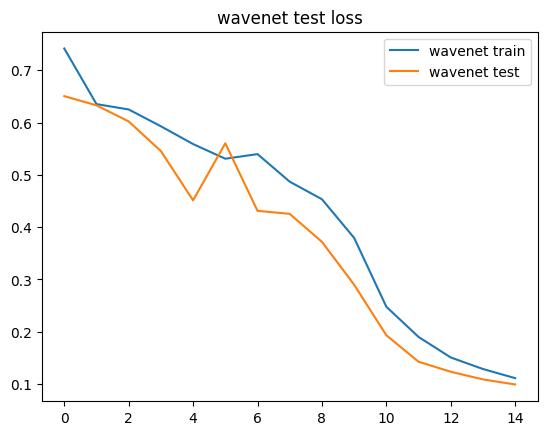

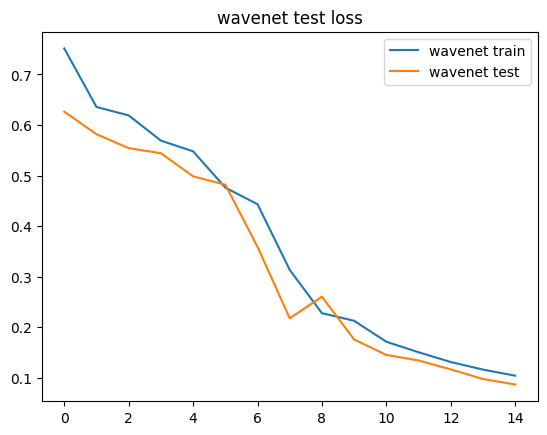

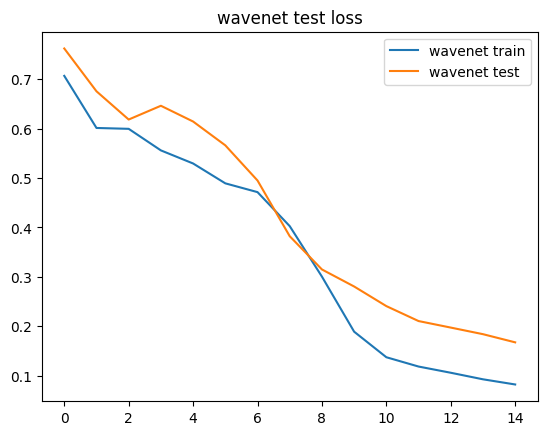

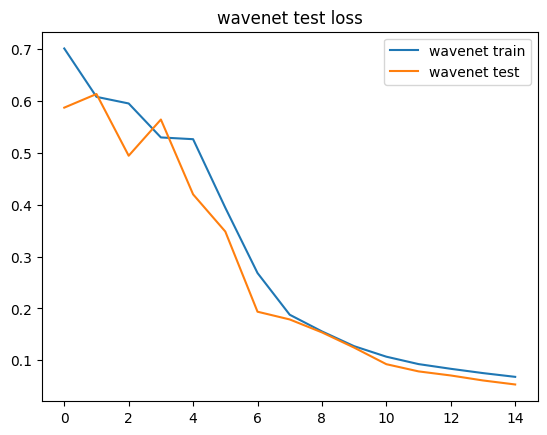

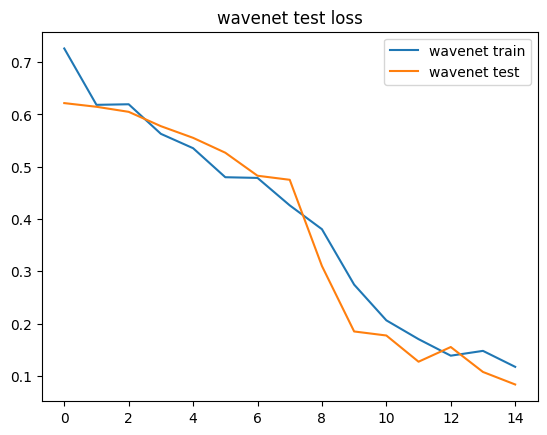

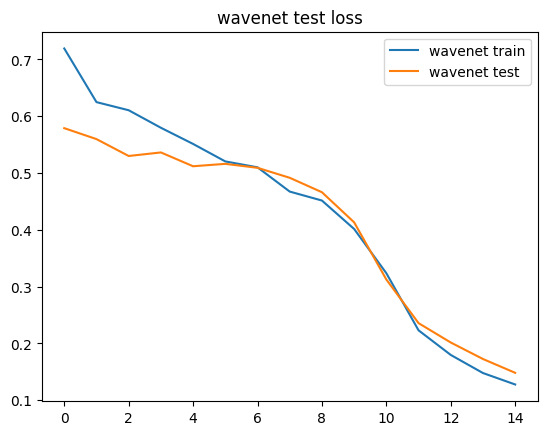

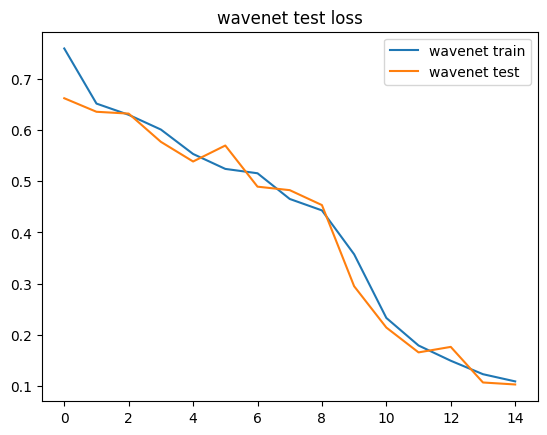

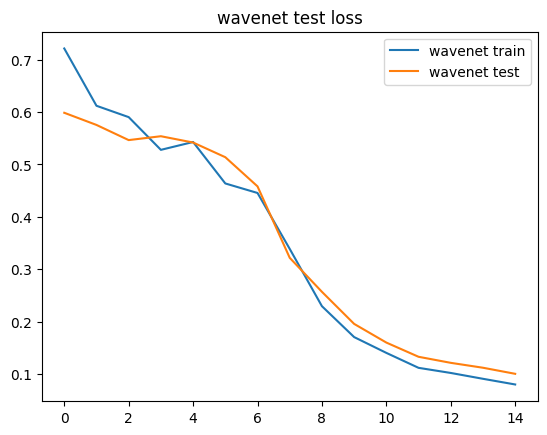

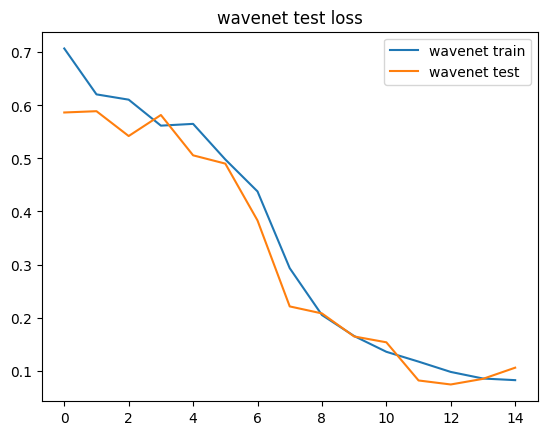

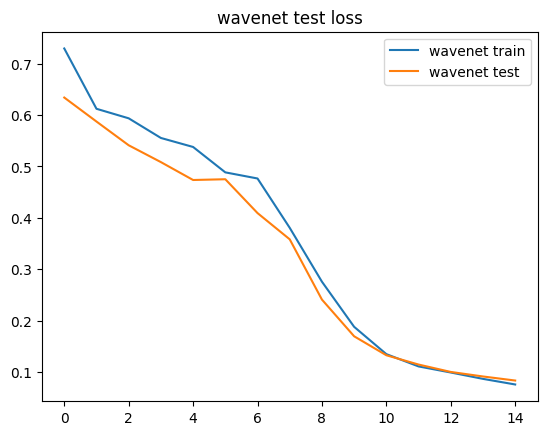

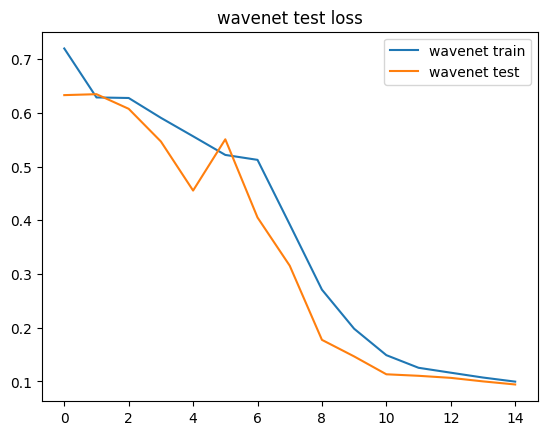

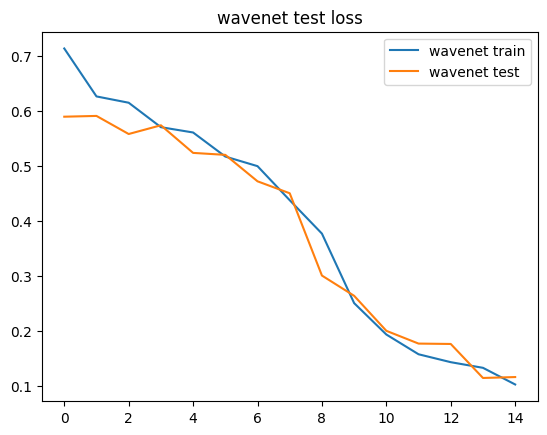

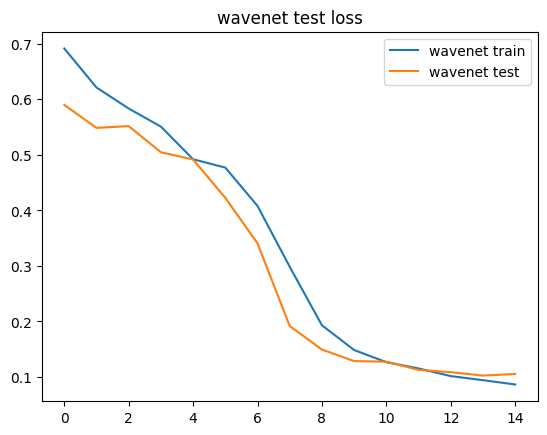

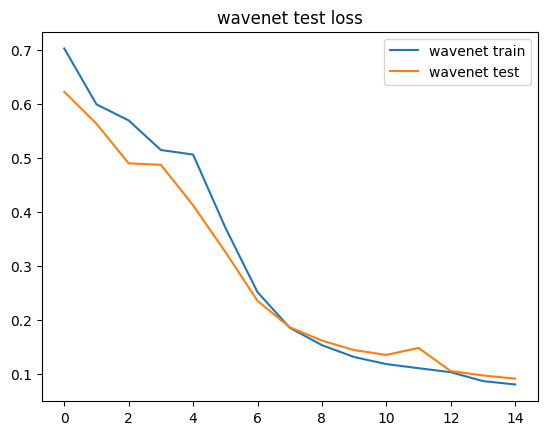

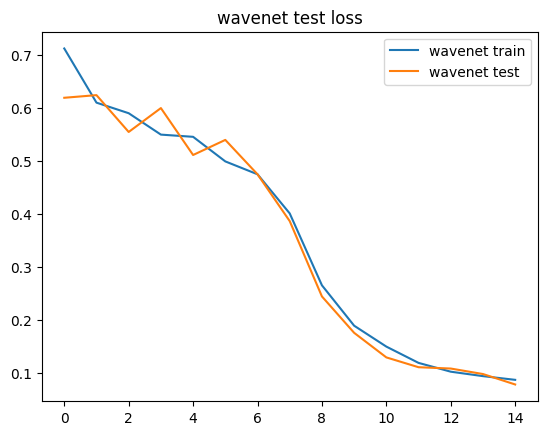

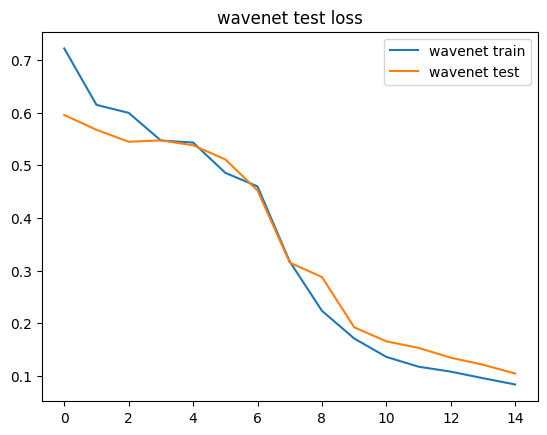

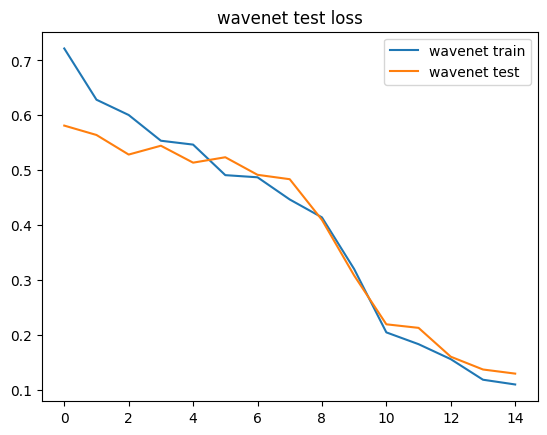

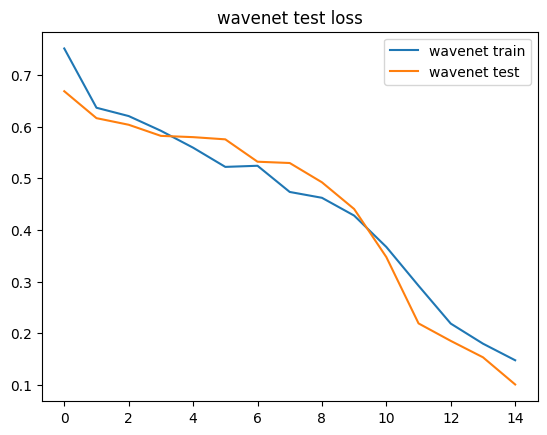

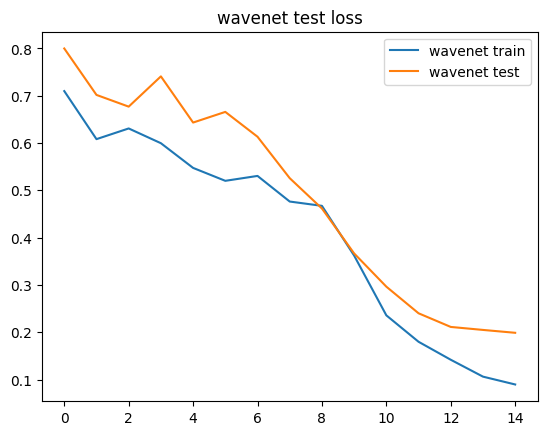

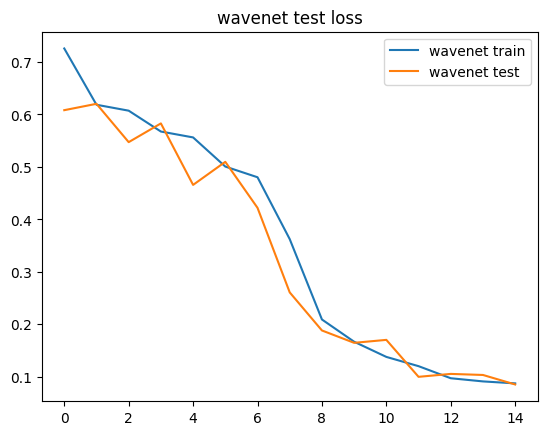

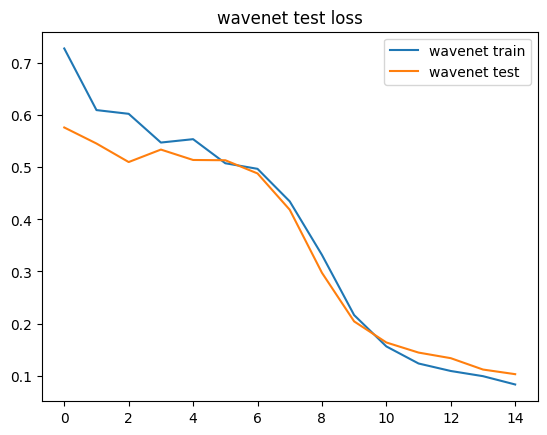

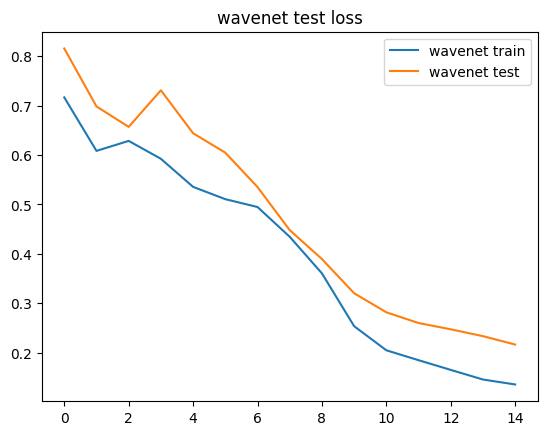

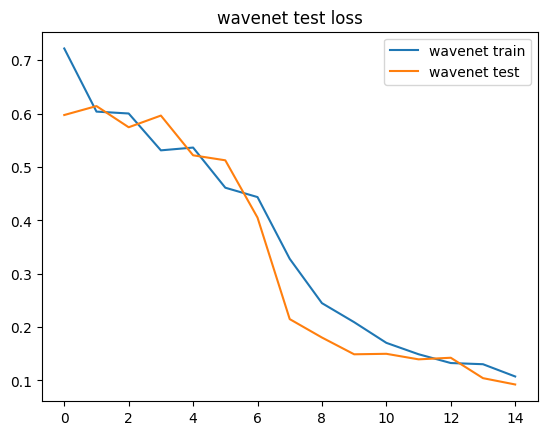

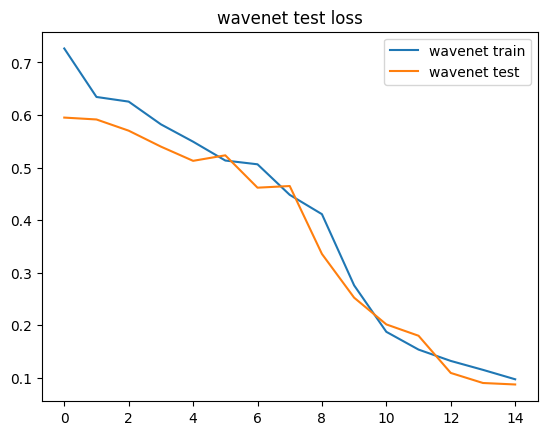

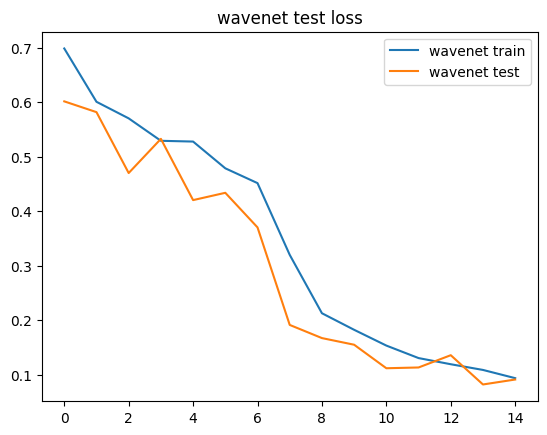

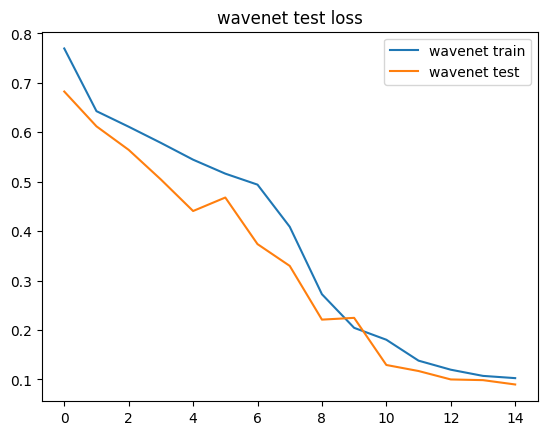

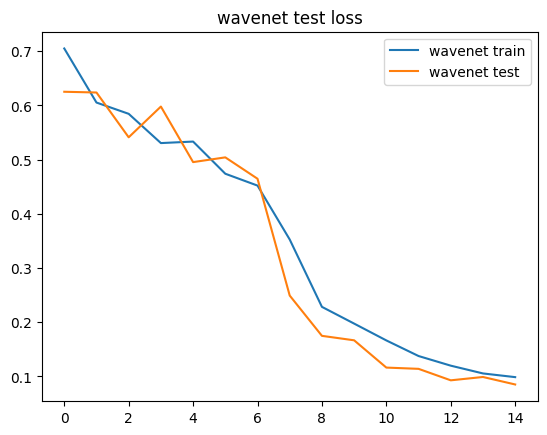

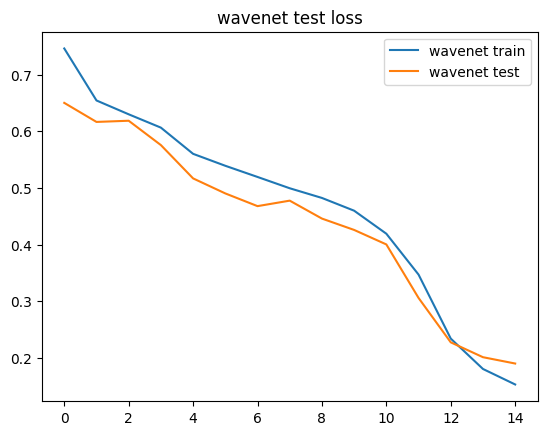

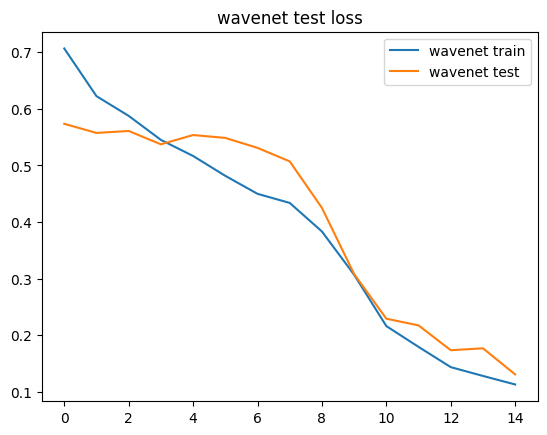

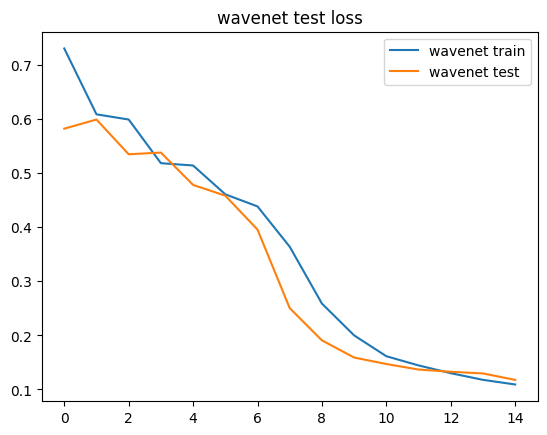

In [5]:
repeats = range(5)
folds = range(10)
epochs = range(15)
models = ['lstm','wavenet']

for m in models:
    path = 'scores/wavenet_vs_lstm/' + m + '.npy'
    scores = np.load(path)
    
    for r in repeats:
        for f in folds:
            tls = []
            vls = []
            for e in epochs:
                tl = scores[r * 10 + f,e, 0]
                vl = scores[r * 10 + f,e, 5]
                tls.append(tl)
                vls.append(vl)
            plt.plot(range(15), tls,label=f'{m} train')
            plt.plot(range(15), vls,label=f'{m} test')
            plt.title(f'{m} test loss')
            plt.legend()
            # plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
            plt.draw()
            plt.pause(0.05)